Q) Build a DeepLearning model to read an Image and Classify it

dataset: Cat vs Dog

Github: https://github.com/revanthpalla/DeepLearning.git

In [26]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import os
import fnmatch
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [27]:
# This is a function for finding images in my file 
def find_files(directory, pattern):
    for root, dirs, files in os.walk(directory):
        for basename in files:
            if fnmatch.fnmatch(basename, pattern):
                filename = os.path.join(root, basename)
                yield filename

In [29]:
catFile = "S:/WInterSem/DeepLearning/Lab/Experiment03/train/cats"
dogFile = "S:/WInterSem/DeepLearning/Lab/Experiment03/train/dogs"

In [30]:
cat_files=[] # empty list 
for filename in find_files(catFile,"*jpg"): 
    file,ext = os.path.split(filename)
    img = Image.open(filename)
    img = img.resize((64,64), Image.ANTIALIAS) # Arrange images size 64x64
    data = np.array( img,np.uint8) # Convert images to matrix
    data=data.sum(axis=2) # This code deacrease column two from three for each array
    np.save("cat",data)
    c = np.load("cat.npy")
    cat_files.append(c)  
np.asarray(cat_files) # Convert list to array
np.save("cat1",cat_files) # final form 

In [31]:
dog_files=[] # empty list 
for filename in find_files(dogFile,"*jpg"):
    file,ext = os.path.split(filename)
    img = Image.open(filename)
    img = img.resize((64,64), Image.ANTIALIAS) 
    data = np.array( img,np.uint8) 
    data=data.sum(axis=2) 
    np.save("dog",data)
    c = np.load("dog.npy")
    dog_files.append(c)  
np.asarray(dog_files) 
np.save("dog1",dog_files)  

(148, 64, 64)


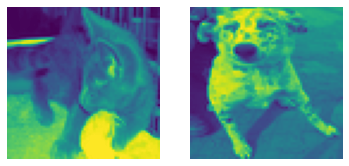

In [33]:
# total cat images 74 and Dog images 74 overall total 148
x1 = np.load("cat1.npy")
x2 =np.load("dog1.npy")
xc = np.concatenate((x1,x2),axis=0)


print(xc.shape)
img_size = 64
plt.subplot(1,2,1)
plt.imshow(xc[1].reshape(img_size,img_size))
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(xc[75].reshape(img_size,img_size))
plt.axis("off")
plt.show()

In [34]:
x1 = np.load("cat1.npy")
x2 =np.load("dog1.npy")

x = np.concatenate((x1,x2),axis=0)

z = np.zeros(74) # Create 74 zeros for 74 cat file
o = np.ones(74)  # Create 74 ones for 74 dog file
y = np.concatenate((z,o),axis=0).reshape(x.shape[0],1) # do vector
print("x shape",x.shape)
print("y shape",y.shape)

#Normalization
x = (x-np.min(x))/(np.max(x)-np.min(x))

x shape (148, 64, 64)
y shape (148, 1)


In [35]:
from sklearn.model_selection import train_test_split # from sklearn module, create train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42) # %15 will be test data
print("x train shape",x_train.shape)
print("x test shape",x_test.shape)
print("y train shape",y_train.shape)
print("y test shape",y_test.shape)

x train shape (125, 64, 64)
x test shape (23, 64, 64)
y train shape (125, 1)
y test shape (23, 1)


In [36]:
# now we have 3 dimensional input array x so we need to make it flatten (2d) in order to use as input for our fist deep learning model.

number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

x_train_flat = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flat = x_test.reshape(number_of_test,x_test.shape[1]*x_test.shape[2]) # now in two dimension
print("x train flat",x_train_flat.shape)
print("x test flat",x_test_flat.shape)

x train flat (125, 4096)
x test flat (23, 4096)


In [37]:
# Transpose to our test and train datas for matrix calculation
x_train = x_train_flat.T
y_train = y_train.T
x_test  = x_test_flat.T
y_test  = y_test.T

print("x train shape",x_train.shape)
print("x test shape",x_test.shape)
print("y train shape",y_train.shape)
print("y test shape",y_test.shape)
print("x train :",x_train)
print("y train: ",y_train)

x train shape (4096, 125)
x test shape (4096, 23)
y train shape (1, 125)
y test shape (1, 23)
x train : [[0.1620915  0.01045752 0.26928105 ... 0.79215686 0.06928105 0.66013072]
 [0.15816993 0.01045752 0.25228758 ... 0.81960784 0.06535948 0.65228758]
 [0.17777778 0.01045752 0.24836601 ... 0.82222222 0.05751634 0.65620915]
 ...
 [0.35163399 0.14771242 0.05490196 ... 0.54771242 0.20392157 0.71503268]
 [0.39346405 0.16078431 0.05098039 ... 0.30196078 0.21830065 0.71372549]
 [0.27973856 0.17124183 0.05490196 ... 0.38169935 0.21960784 0.71503268]]
y train:  [[1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.
  1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
  1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0.
  0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
  0. 1. 0. 1. 1.]]


In [38]:
# since the accuracy is very we need to add hidden layers in our model and train it.
from sklearn import linear_model
lr = linear_model.LogisticRegression(random_state =42,max_iter= 15000)
print("test accuracy: {} ".format(lr.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(lr.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.21739130434782608 
train accuracy: 1.0 


In [40]:
# Define sigmoid function to predict y values between 0 and 1 
def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head

In [41]:
# Define the inital parameters 
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [42]:
# Begin to process with initial parameters
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [43]:
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [44]:
# Bacward propagation
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [45]:
# Update parameters with information which came from backward process
def update_parameters_NN(parameters, grads, learning_rate = 0.001):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

In [46]:
# Create prediction between 0 and 1
def predict_NN(parameters,x_test):
    
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

Cost after iteration 0: 0.353136
Cost after iteration 1000: 0.345740
Cost after iteration 2000: 0.341401
Cost after iteration 3000: 0.339757
Cost after iteration 4000: 0.335310
Cost after iteration 5000: 0.329656
Cost after iteration 6000: 0.322607
Cost after iteration 7000: 0.313534
Cost after iteration 8000: 0.303415
Cost after iteration 9000: 0.292413


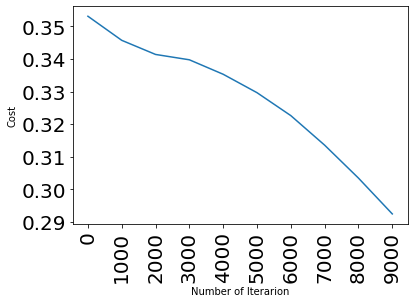

train accuracy: 76.8 %
test accuracy: 60.869565217391305 %


In [50]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []

    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 1000 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=10000)

(-0.5, 63.5, 63.5, -0.5)

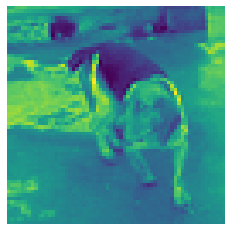

In [58]:
# testing an image
img = Image.open('S:/WInterSem/DeepLearning/Lab/Experiment03/test/12492.jpg')
img = img.resize((64,64), Image.ANTIALIAS)
data = np.array( img,np.uint8)
data=data.sum(axis=2) 
np.save("test",data)
c = np.load("test.npy")
img_numpy = np.asarray(c)
plt.imshow(img_numpy)
plt.axis("off")

In [69]:
# Im getting error in parameter shape will try to rectify it sir
img_numpy_flat = img_numpy.reshape(64*64)
x_test  = img_numpy_flat.T
print("x test shape",x_test.shape)
predict_NN(parameters, x_test)

x test shape (4096,)


IndexError: tuple index out of range